In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
### Load dataset group information
df_group = pd.read_csv('./input/data_partition.txt', sep='\t')
df_group.index = df_group.data_group.to_list()
datasets = []; dgroup = dict();
for i in df_group.index:
    entries = df_group.data_entries[i].split(',')
    for e in entries:
        dgroup[e] = i
    datasets += entries

### Load kapp data
df_kapp = pd.read_excel('../parameterization/results/kapp_inPerSec.xlsx')
df_kapp.index = df_kapp.id.to_list()
rxns = df_kapp.index.to_list()
df_kapp = df_kapp.loc[:, datasets]

In [3]:
### Compile kapp_max
df_kappmax = pd.DataFrame(index=rxns, columns=['id', 'kappmax (1/s)', 'dataset'])
df_kappmax['id'] = df_kappmax.index.to_list()
for rxn in rxns:
    kmax = df_kapp.loc[rxn, datasets].fillna(0).max()
    dmax = df_kapp.loc[rxn, datasets].fillna(0).idxmax()
    
    df_kappmax.loc[rxn, 'kappmax (1/s)'] = kmax
    df_kappmax.loc[rxn, 'dataset'] = dmax
    df_kappmax.loc[rxn, 'data_group'] = dgroup[dmax]
    
df_kappmax = df_kappmax[df_kappmax['kappmax (1/s)'] > 0]

In [4]:
### Compile kapp / kappmax
rxns = df_kapp.index.to_list()
groups = df_group.data_group.to_list()
df_ratio = pd.DataFrame(index=rxns, columns=['rxn'] + groups)
df_ratio['rxn'] = df_ratio.index.to_list()

for rxn in rxns:
    for group in groups:
        dsets = df_group.data_entries[group].split(',')
        kapps = [df_kapp.loc[rxn,d] for d in dsets if pd.isnull(df_kapp.loc[rxn,d]) == False]
        if kapps == []:
            continue
        else:
            kmax_within = max(kapps)
            kmax_across = df_kappmax.loc[rxn, 'kappmax (1/s)']
            df_ratio.loc[rxn, group] = kmax_within / kmax_across

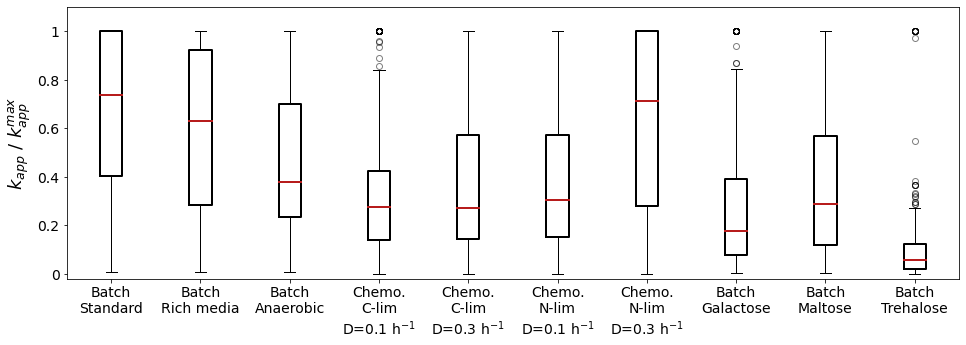

In [21]:
fig,ax = plt.subplots(figsize=(16,5))

w = 0.25
flierprops = {'marker': 'o', 'markersize': 1}
medianprops = dict(linestyle='-', linewidth=2, color='#b71c1c')
boxprops = dict(linestyle='-', linewidth=2)
whiskerprops = dict(linestyle='-', linewidth=1)
flierprops = dict(marker='o', alpha=0.5)

for i in range(0, len(groups)):
    group = groups[i]
    vals = [v for v in df_ratio[group] if pd.isnull(v) == False]
    ax.boxplot(vals, positions=[i], widths=w, boxprops=boxprops,
           medianprops=medianprops, whiskerprops=whiskerprops,
           flierprops=flierprops);
    
ax.set_ylim(-0.02, 1.1);
yticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax.set_yticks(yticks);
ax.set_yticklabels(yticks, fontsize=14);
ax.set_ylabel('$k_{app}$ $/$ $k_{app}^{max}$', fontsize=18)

xlabels = ['Batch\nStandard', 'Batch\nRich media', 'Batch\nAnaerobic',
           'Chemo.\nC-lim\nD=0.1 h$^{-1}$', 'Chemo.\nC-lim\nD=0.3 h$^{-1}$',
           'Chemo.\nN-lim\nD=0.1 h$^{-1}$', 'Chemo.\nN-lim\nD=0.3 h$^{-1}$',
           'Batch\nGalactose', 'Batch\nMaltose', 'Batch\nTrehalose']
xticks = range(0, len(xlabels))
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, fontsize=14);

In [36]:
idx_check = df_ratio[(df_ratio.chemo_highN > 0.9) & (df_ratio.batch_std < 0.9)].index
for i in idx_check:
    print(i, round(df_ratio.batch_std[i], 2), round(df_ratio.chemo_highN[i],2))

3DSPHR_r_FWD 0.17 1.0
3HACD200_rm_FWD 0.12 1.0
3HACD220_rm_FWD 0.12 1.0
3HACD240_rm_FWD 0.12 1.0
3HACD260_rm_FWD 0.12 1.0
3OACR200_rm_FWD 0.24 1.0
3OACR220_rm_FWD 0.24 1.0
3OACR240_rm_FWD 0.24 1.0
3OACR260_rm_FWD 0.24 1.0
AASADy_c_FWD 0.38 1.0
ACCOAC_c_FWD 0.73 1.0
ACOADS160_rm_FWD 0.12 1.0
ACOADS180_rm_FWD 0.12 1.0
ACOTAi_m_FWD 0.41 1.0
ADSL1r_c_FWD 0.71 1.0
ADSL2i_c_FWD 0.71 1.0
ADSS_c_FWD 0.55 1.0
AFAT_c_FWD 0.36 1.0
ALDD2y_c_FWD 0.64 1.0
ANS_c_FWD 0.52 1.0
ARGTRS_c_FWD 0.7 1.0
ASNS1_c_FWD 0.77 1.0
ASPCT_c_FWD 0.56 1.0
ASPK_c_FWD 0.44 1.0
ASPTRS_c_FWD 0.67 1.0
ATPPRT_c_FWD 0.57 1.0
BPNT_c_FWD 0.13 1.0
C14STR_c_FWD 0.77 1.0
C24STR_r_FWD 0.21 1.0
CDPDAGS_rm_FWD 0.73 1.0
COAt_c_m_FWD 0.85 1.0
CTPS2_c_FWD 0.27 1.0
CYSTRS_c_FWD 0.45 1.0
DDPA_c_FWD 0.31 1.0
DHORDfum_c_FWD 0.53 1.0
DHORTS_c_REV 0.48 1.0
DHQS_c_FWD 0.76 1.0
DHQTi_c_FWD 0.76 1.0
DPMVD_c_FWD 0.31 1.0
FE2t_c_e_FWD 0.08 1.0
FE2t_c_m_FWD 0.51 1.0
GALUi_c_FWD 0.85 1.0
GLNTRS_c_FWD 0.65 1.0
GLU5K_c_FWD 0.43 1.0
GLUPRT_c_FWD 0.85 0

In [8]:
df_group = pd.read_csv('./input/data_partition.txt', sep='\t')
df_group.index = df_group.data_group.to_list()